In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from sympy import sympify, integrate, Symbol, simplify, Piecewise
from sympy.plotting import plot
from typing import Union
from sympy import Derivative, diff, maximum, Interval, solve, Eq

In [29]:
from mm.forces import *
from mm.symbols import _x
from mm.structures import *
# from mm import *

### **Orden**
1. Momento
2. Punto
3. Distribuido

In [30]:
carga1 = Moment(18)
carga2 = PointLoad(50.333)
# carga3 = DistributedLoad(0)
carga4 = PointLoad(-25)
# carga5 = DistributedLoad(0)
carga6 = DistributedLoad(-40)
carga7 = PointLoad(70.3333)
carga8 = Moment(-27)

In [31]:
viga = Beam()

In [32]:
viga.addForce(carga1, 0)
viga.addForce(carga2, 0)
# viga.addForce(carga3, (0,0.6))
viga.addForce(carga4, 0.6)
# viga.addForce(carga5, (0.6,1.2))
viga.addForce(carga6, (1.2,3.6))
viga.addForce(carga7, 3.6)
viga.addForce(carga8, 3.6)

In [33]:
viga.bmd()

Piecewise((18 - 50.333*x, (x < 0.6) & (x >= 0)), (3.0 - 25.333*x, (x >= 0.6) & (x < 1.2)), (20.0*x**2 - 73.333*x + 31.8, (x >= 1.2) & (x < 3.6)), (0, (x >= 3.6) & (x <= 3.6)))

In [34]:
Eq(viga.sfd(),0)

Eq(Piecewise((50.333, (x < 0.6) & (x >= 0)), (25.333, (x >= 0.6) & (x < 1.2)), (73.333 - 40*x, (x >= 1.2) & (x < 3.6)), (0, (x >= 3.6) & (x <= 3.6))), 0)

In [41]:
solve(Eq(viga.sfd(),0.00001))

[1.83332475000000]

In [42]:
viga.zeros("sfd", 0.00001)

NotImplementedError: solve cannot represent interval solutions

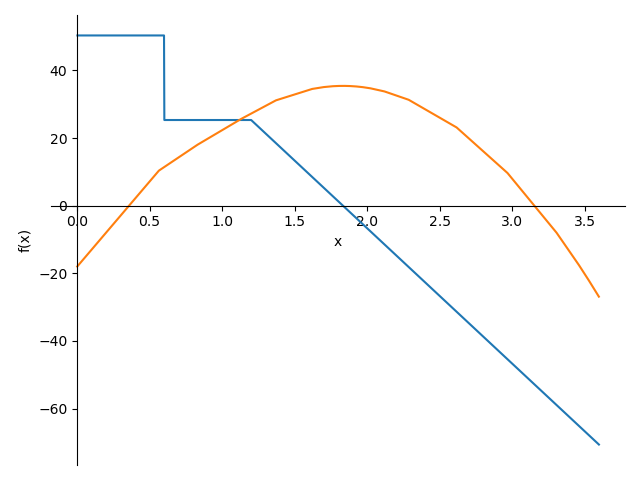

In [ ]:
ax = plot(viga.sfd(), show=False)
ax.append(plot(viga.bmd("asdsad"), show=False)[0])
ax.show()
